** Below, we open and read all the data, select 6 companies among them, select 2 year-span to work (2014 & 2015), add new columns for year, month, etc.***

In [56]:
# Import required packages
import pandas as pd         
import gzip
import matplotlib.pyplot as plt  

# Open and read the stock file provided
# Then convert the whole file to a data frame

with gzip.open('all_ticks_long.csv.gz', 'rt') as file:
    df = pd.read_csv(file)

In [57]:
# Find all companies included
company_names = df['short_name'].unique()

# Select 6 companies to work with
our_companies = ['KCHOL', 'SAHOL', 'GARAN', 'AKBNK', 'PGSUS', 'THYAO']


# For each company chosen, take the rows containing the company names, then reorder the rows with respect to time, and adjust the indices 
# By this, we have a separate data frame for each company

kchol_df = df[df['short_name'].str.contains('KCHOL')].sort_values(by= 'timestamp').reset_index(drop=True)
sahol_df = df[df['short_name'].str.contains('SAHOL')].sort_values(by= 'timestamp').reset_index(drop=True)
garan_df = df[df['short_name'].str.contains('GARAN')].sort_values(by= 'timestamp').reset_index(drop=True)
akbnk_df = df[df['short_name'].str.contains('AKBNK')].sort_values(by= 'timestamp').reset_index(drop=True)
pgsus_df = df[df['short_name'].str.contains('PGSUS')].sort_values(by= 'timestamp').reset_index(drop=True)
thyao_df = df[df['short_name'].str.contains('THYAO')].sort_values(by= 'timestamp').reset_index(drop=True)


# Check if any data frame has nan values
nan_count_1 = kchol_df.isna().sum()
nan_count_2 = sahol_df.isna().sum()
nan_count_3 = garan_df.isna().sum()
nan_count_4 = akbnk_df.isna().sum()
nan_count_5 = pgsus_df.isna().sum()
nan_count_6 = thyao_df.isna().sum()

print(nan_count_1)
print(nan_count_2)
print(nan_count_3)
print(nan_count_4)
print(nan_count_5)
print(nan_count_6)

# The data is cleared beforehand, so there are no nan values.

short_name    0
timestamp     0
price         0
dtype: int64
short_name    0
timestamp     0
price         0
dtype: int64
short_name    0
timestamp     0
price         0
dtype: int64
short_name    0
timestamp     0
price         0
dtype: int64
short_name    0
timestamp     0
price         0
dtype: int64
short_name    0
timestamp     0
price         0
dtype: int64


In [ ]:
# Write a function for splitting the timestamp column into Year, Month, Day, Hour, Minute, and Second columns
# Then reconstruct the data frame with those additional columns

def split_timestamp (df):
    times_df = df['timestamp'].str.split('[-T:]', expand=True)
    merged = pd.concat([df, times_df], axis=1)
    columns = ['company', 'timestamp', 'price', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']
    merged.columns = columns
    return merged

kchol_merged_df = split_timestamp(kchol_df)
sahol_merged_df = split_timestamp(sahol_df)
garan_merged_df = split_timestamp(garan_df)
akbnk_merged_df = split_timestamp(akbnk_df)
pgsus_merged_df = split_timestamp(pgsus_df)
thyao_merged_df = split_timestamp(thyao_df)


# Define a list of years to remove
years_to_remove = ['2012', '2013', '2016', '2017', '2018', '2019']

# Remove rows with 'Year' values in the list
kchol_merged_df = kchol_merged_df[~kchol_merged_df['Year'].isin(years_to_remove)]
sahol_merged_df = sahol_merged_df[~sahol_merged_df['Year'].isin(years_to_remove)]
garan_merged_df = garan_merged_df[~garan_merged_df['Year'].isin(years_to_remove)]
akbnk_merged_df = akbnk_merged_df[~akbnk_merged_df['Year'].isin(years_to_remove)]
pgsus_merged_df = pgsus_merged_df[~pgsus_merged_df['Year'].isin(years_to_remove)]
thyao_merged_df = thyao_merged_df[~thyao_merged_df['Year'].isin(years_to_remove)]

In [ ]:
# Write a function to have a separate data frame for each month for each company

def group_by_month(df):
    list=[]
    grouped_year = df.groupby('Year')
    for group_name, group_df in grouped_year:
        list.append(group_df)

    grouped_month = []
    for i in list:
        x = i.groupby('Month')
        for group_name, group_df in x:
            grouped_month.append(group_df)

    return grouped_month


kchol_grouped=data = group_by_month(kchol_merged_df)
sahol_grouped_data = group_by_month(sahol_merged_df)
garan_grouped_data = group_by_month(garan_merged_df)
akbnk_grouped_data = group_by_month(akbnk_merged_df)
pgsus_grouped_data = group_by_month(pgsus_merged_df)
thyao_grouped_data = group_by_month(thyao_merged_df)

# The output of the above function is a list. The list items are data frames. For example, the first item in 'kchol_grouped_data' list
    # is the data frame of KCHOL stock in the first month (for our case, the first month is 2014 January).


print(kchol_grouped_data[0])


**Below, we construct a boxplot for each company. The x-axis represents the month number. For example, the boxplot at month = 1 belongs to January, 2024. The boxplot at month = 13 belongs to January, 2015.**

BOXPLOTS FOR KCHOL (KOÇ HOLDİNG):

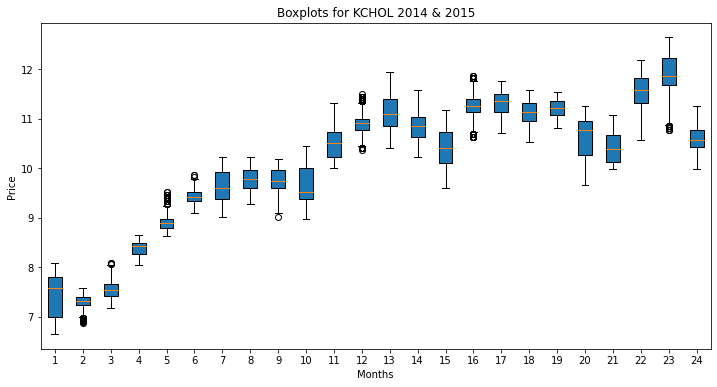

In [47]:
# Extract 'Price' columns from all DataFrames
all_prices = [df['price'] for df in kchol_grouped_data]

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Create a boxplot with the 'all_prices' list
bp = ax.boxplot(all_prices, patch_artist=True, labels=range(1, 25))

# Set labels for the x-axis and y-axis
ax.set_xlabel('Months')
ax.set_ylabel('Price')

# Set a title for the entire graph
ax.set_title('Boxplots for KCHOL 2014 & 2015')

# Display the plot
plt.show()


BOXPLOTS FOR SAHOL (SABANCI HOLDİNG):

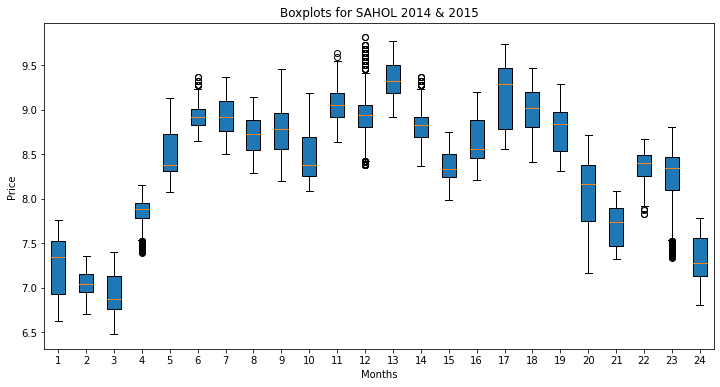

In [9]:
# Extract 'Price' columns from all DataFrames
all_prices = [df['price'] for df in sahol_grouped_data]

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Create a boxplot with the 'all_prices' list
bp = ax.boxplot(all_prices, patch_artist=True, labels=range(1, 25))

# Set labels for the x-axis and y-axis
ax.set_xlabel('Months')
ax.set_ylabel('Price')

# Set a title for the entire graph
ax.set_title('Boxplots for SAHOL 2014 & 2015')

# Display the plot
plt.show()


BOXPLOTS FOR GARAN (GARANTİ BANKASI):

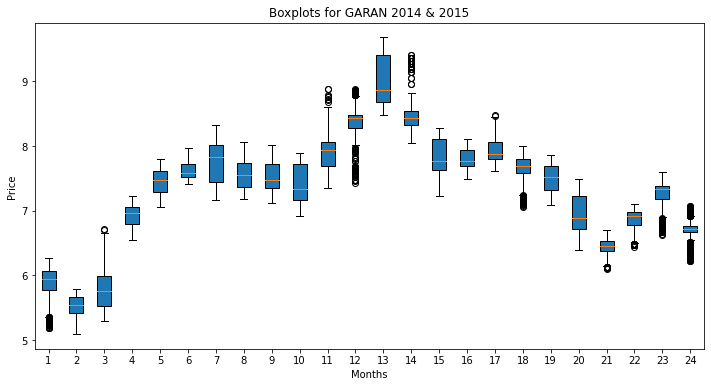

In [10]:
# Extract 'Price' columns from all DataFrames
all_prices = [df['price'] for df in garan_grouped_data]

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Create a boxplot with the 'all_prices' list
bp = ax.boxplot(all_prices, patch_artist=True, labels=range(1, 25))

# Set labels for the x-axis and y-axis
ax.set_xlabel('Months')
ax.set_ylabel('Price')

# Set a title for the entire graph
ax.set_title('Boxplots for GARAN 2014 & 2015')

# Display the plot
plt.show()


BOXPLOTS FOR AKBNK (AKBANK):

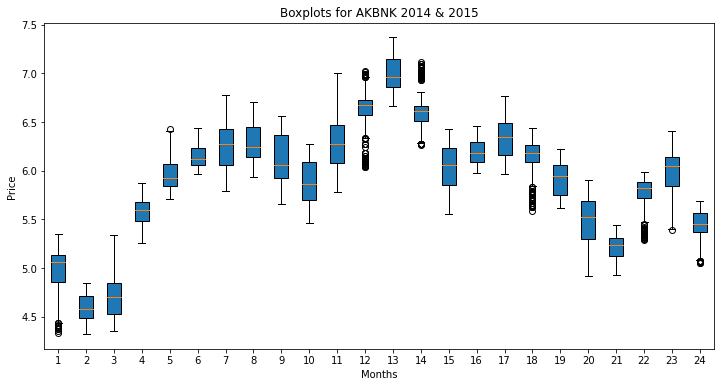

In [11]:
# Extract 'Price' columns from all DataFrames
all_prices = [df['price'] for df in akbnk_grouped_data]

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Create a boxplot with the 'all_prices' list
bp = ax.boxplot(all_prices, patch_artist=True, labels=range(1, 25))

# Set labels for the x-axis and y-axis
ax.set_xlabel('Months')
ax.set_ylabel('Price')

# Set a title for the entire graph
ax.set_title('Boxplots for AKBNK 2014 & 2015')

# Display the plot
plt.show()


BOXPLOTS FOR PGSUS (PEGASUS HAVAYOLLARI):

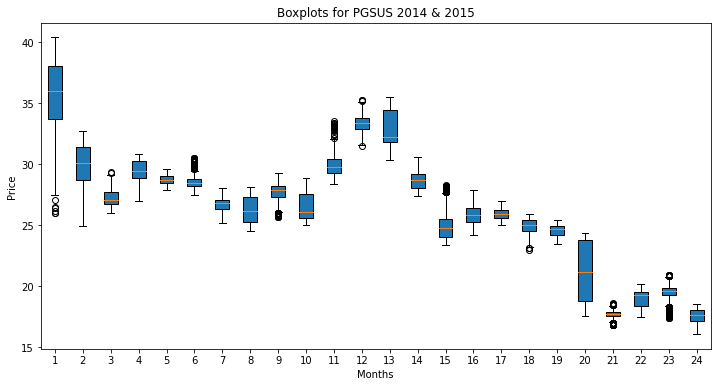

In [12]:
# Extract 'Price' columns from all DataFrames
all_prices = [df['price'] for df in pgsus_grouped_data]

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Create a boxplot with the 'all_prices' list
bp = ax.boxplot(all_prices, patch_artist=True, labels=range(1, 25))

# Set labels for the x-axis and y-axis
ax.set_xlabel('Months')
ax.set_ylabel('Price')

# Set a title for the entire graph
ax.set_title('Boxplots for PGSUS 2014 & 2015')

# Display the plot
plt.show()


BOXPLOTS FOR THYAO (TÜRK HAVA YOLLARI):

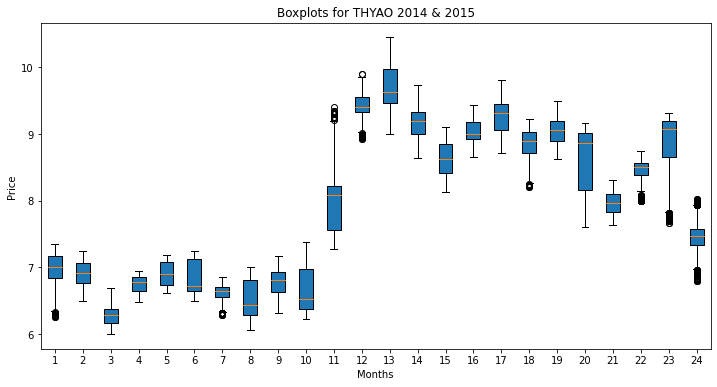

In [13]:
# Extract 'Price' columns from all DataFrames
all_prices = [df['price'] for df in thyao_grouped_data]

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Create a boxplot with the 'all_prices' list
bp = ax.boxplot(all_prices, patch_artist=True, labels=range(1, 25))

# Set labels for the x-axis and y-axis
ax.set_xlabel('Months')
ax.set_ylabel('Price')

# Set a title for the entire graph
ax.set_title('Boxplots for THYAO 2014 & 2015')

# Display the plot
plt.show()


**Below, we construct a control chart with 3-sigma rule for each month that includes outlier for each company.**

In [ ]:
def find_outliers(list):
    for i in list:      # list parameter will be the list of dataframes of each company. We iterate the list to get the data frame of each month and calculate the required statistics.
        mean = i['price'].mean()       # Calculate the mean of current data frame
        std_dev = i['price'].std()          # Calculate the standand deviation of current data frame
        df = i

        lower_bound = mean - 3 * std_dev        # Calculate the lower control limit with 3-sigma
        upper_bound = mean + 3 * std_dev        # Calculate the upper control limit with 3-sigma
        outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]    # Find the data points that exceed the limits and construct a dataframe of outliers.
        
        if not outliers.empty:      # Draw the line of each month only if there's outliers
            print(outliers)         # Print outliers' data frame for visibility

            x_values = i['timestamp']       # x-axis of the line is timestamp column
            y_values = i['price']           # y-axis of the line is price column
            fig, ax = plt.subplots(figsize=(15, 10))        

            ax.plot(x_values, y_values, label = 'Data Line' )  # Draw a line 
            plt.axhline(y=upper_bound, color='r', linestyle='--', label='Subline (y=upper_bound)')      # Draw the upper control limit
            plt.axhline(y=lower_bound, color='r', linestyle='--', label='Subline (y=lower_bound)')      # Draw the lower control limit
            plt.axhline(y=mean, color='g', linestyle='--', label='Subline (y=mean)')                    # Draw the mean
        
            highlight_x = outliers['timestamp']         # Select the outlier points
            highlight_y = outliers['price']

            plt.scatter(highlight_x, highlight_y, color='red', label=f'Point ({highlight_x}, {highlight_y})', zorder=5)   #   Draw the outlier points on the line
            plt.legend()

# This function will output the line-plot of each month that includes outliers

     company             timestamp   price  Year Month Day Hour Minute Second
8873   KCHOL  2014-02-04T07:45:00Z  6.8699  2014    02  04   07     45    00Z
8874   KCHOL  2014-02-04T08:00:00Z  6.8879  2014    02  04   08     00    00Z
8878   KCHOL  2014-02-04T09:00:00Z  6.8879  2014    02  04   09     00    00Z
      company             timestamp   price  Year Month Day Hour Minute Second
10945   KCHOL  2014-05-30T06:30:00Z  9.4213  2014    05  30   06     30    00Z
10959   KCHOL  2014-05-30T11:30:00Z  9.4213  2014    05  30   11     30    00Z
10960   KCHOL  2014-05-30T11:45:00Z  9.5115  2014    05  30   11     45    00Z
10961   KCHOL  2014-05-30T12:00:00Z  9.4663  2014    05  30   12     00    00Z
10962   KCHOL  2014-05-30T12:15:00Z  9.4663  2014    05  30   12     15    00Z
10963   KCHOL  2014-05-30T12:30:00Z  9.4663  2014    05  30   12     30    00Z
10964   KCHOL  2014-05-30T12:45:00Z  9.5115  2014    05  30   12     45    00Z
10965   KCHOL  2014-05-30T13:00:00Z  9.4663  2014    05 

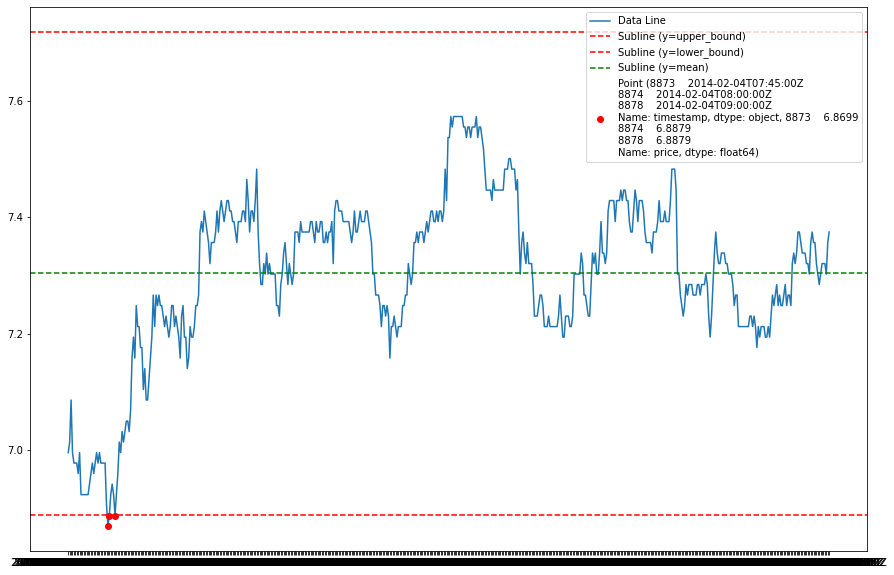

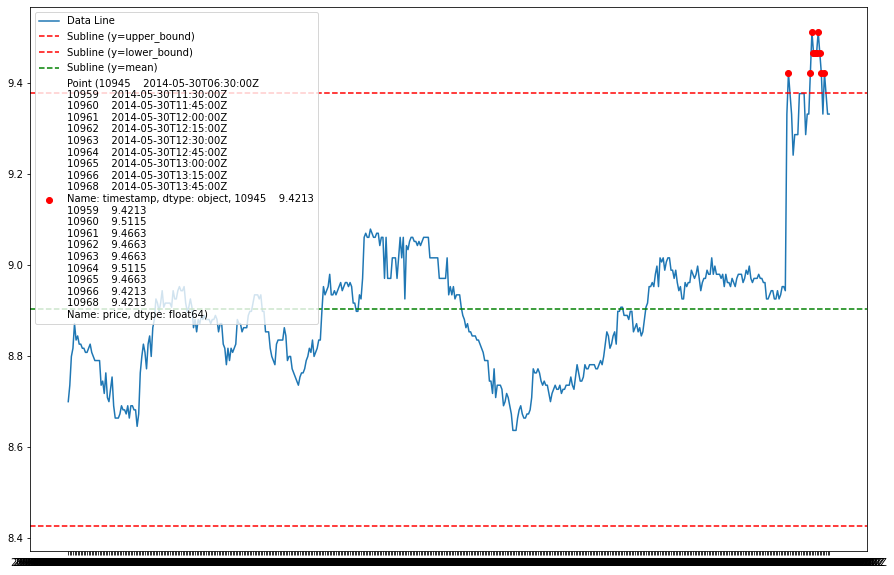

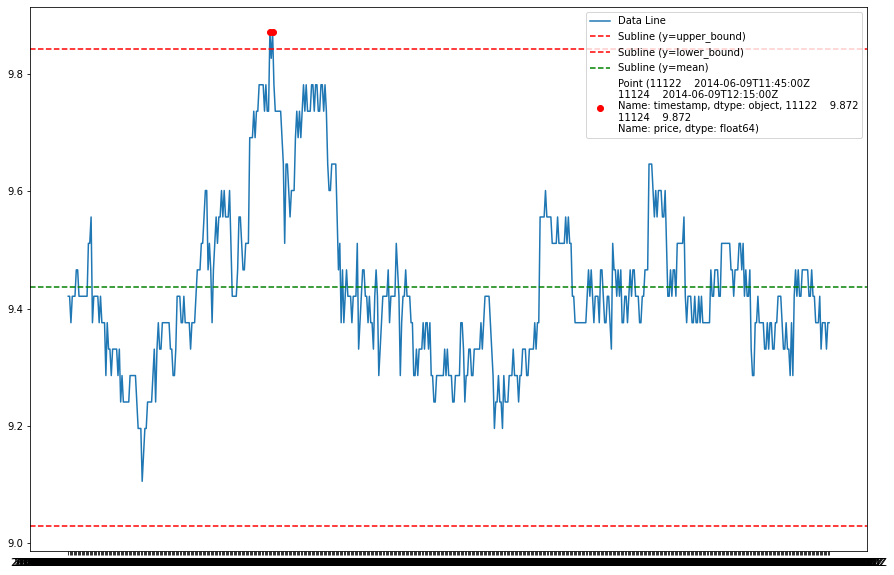

In [59]:
# Find and highlight the outlier points of KCHOL 

find_outliers(kchol_grouped_data)

      company             timestamp   price  Year Month Day Hour Minute Second
11145   SAHOL  2014-06-11T06:30:00Z  9.3639  2014    06  11   06     30    00Z
11146   SAHOL  2014-06-11T06:45:00Z  9.3639  2014    06  11   06     45    00Z
      company             timestamp   price  Year Month Day Hour Minute Second
14270   SAHOL  2014-11-28T14:45:00Z  9.6315  2014    11  28   14     45    00Z
      company             timestamp   price  Year Month Day Hour Minute Second
14288   SAHOL  2014-12-01T12:30:00Z  9.8099  2014    12  01   12     30    00Z
14289   SAHOL  2014-12-01T12:45:00Z  9.8099  2014    12  01   12     45    00Z


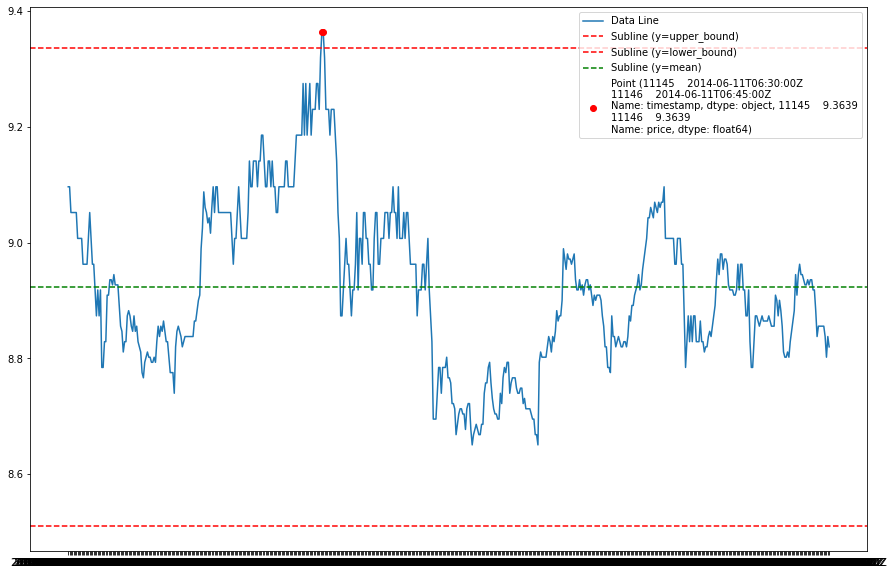

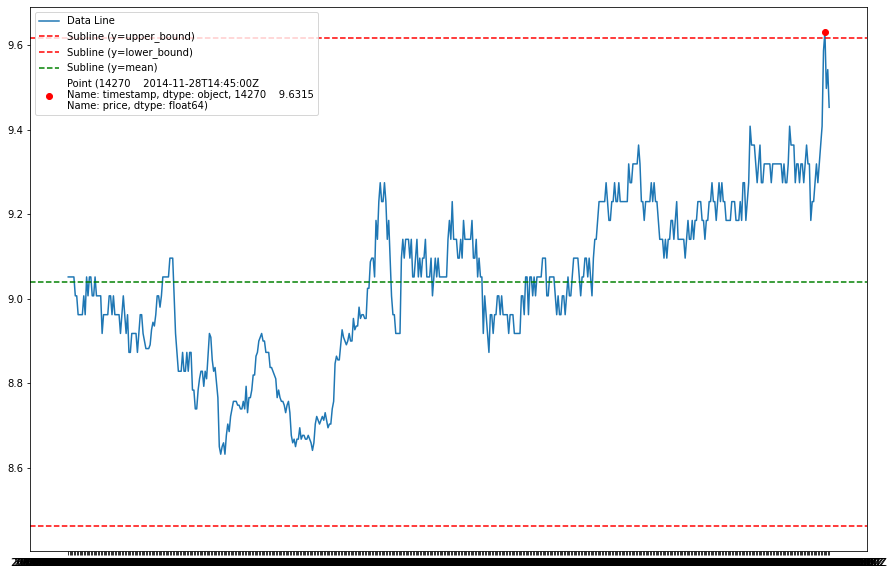

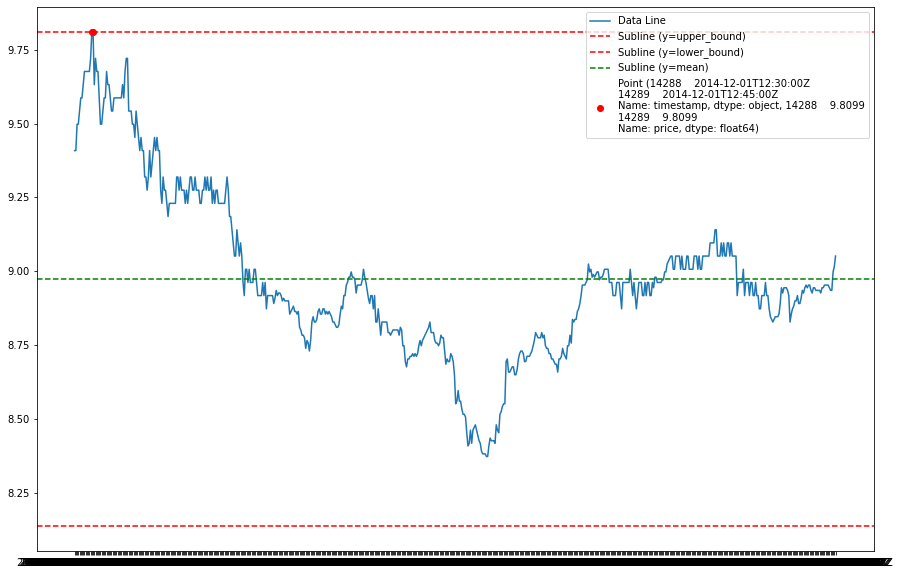

In [23]:
# Find and highlight the outlier points of SAHOL 

find_outliers(sahol_grouped_data)

      company             timestamp   price  Year Month Day Hour Minute Second
14433   GARAN  2014-11-28T14:30:00Z  8.8857  2014    11  28   14     30    00Z
14434   GARAN  2014-11-28T14:45:00Z  8.8766  2014    11  28   14     45    00Z
      company             timestamp   price  Year Month Day Hour Minute Second
14759   GARAN  2014-12-16T14:30:00Z  7.5352  2014    12  16   14     30    00Z
14760   GARAN  2014-12-16T14:45:00Z  7.4271  2014    12  16   14     45    00Z
14761   GARAN  2014-12-16T15:00:00Z  7.4631  2014    12  16   15     00    00Z
14762   GARAN  2014-12-16T15:15:00Z  7.4722  2014    12  16   15     15    00Z
14763   GARAN  2014-12-16T15:30:00Z  7.4722  2014    12  16   15     30    00Z
14764   GARAN  2014-12-17T07:30:00Z  7.4722  2014    12  17   07     30    00Z
14765   GARAN  2014-12-17T07:45:00Z  7.5262  2014    12  17   07     45    00Z
14766   GARAN  2014-12-17T08:00:00Z  7.5711  2014    12  17   08     00    00Z
14767   GARAN  2014-12-17T08:15:00Z  7.5711  2014   

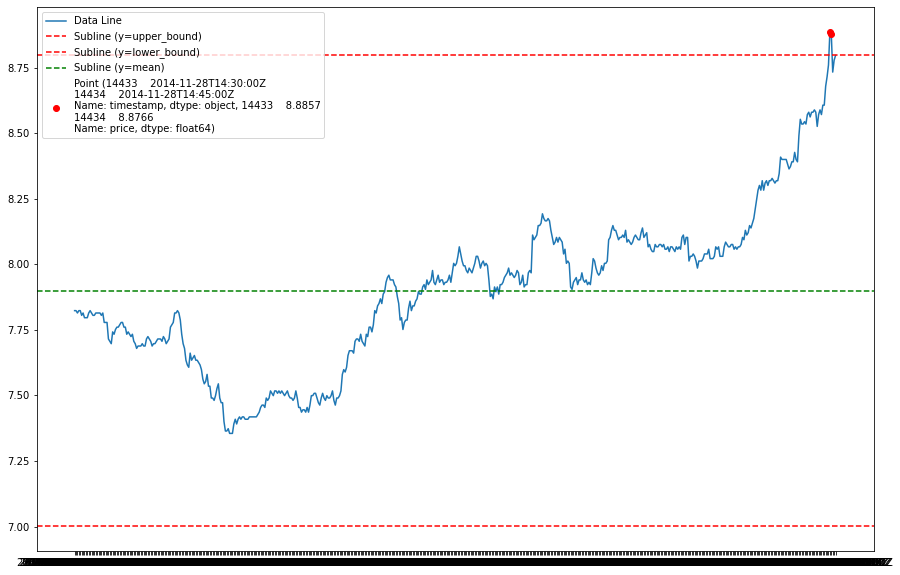

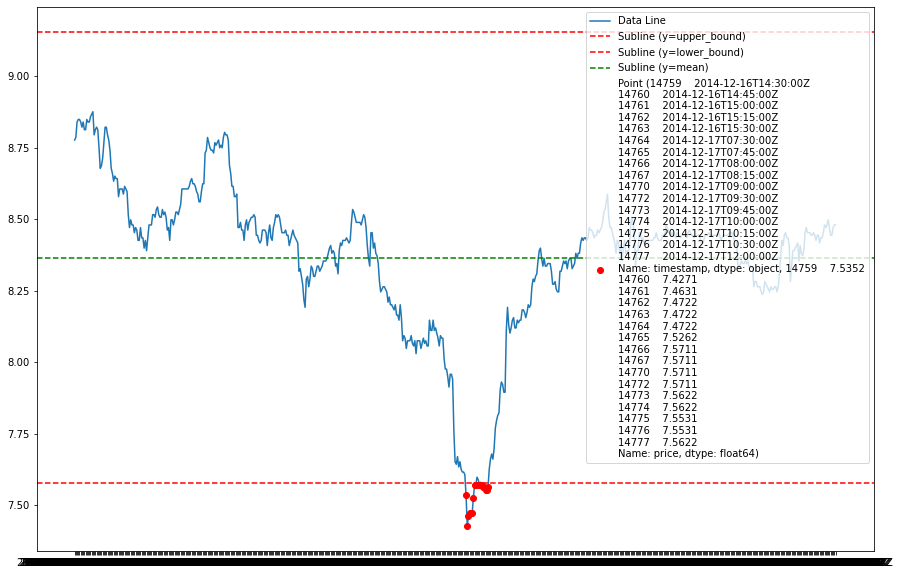

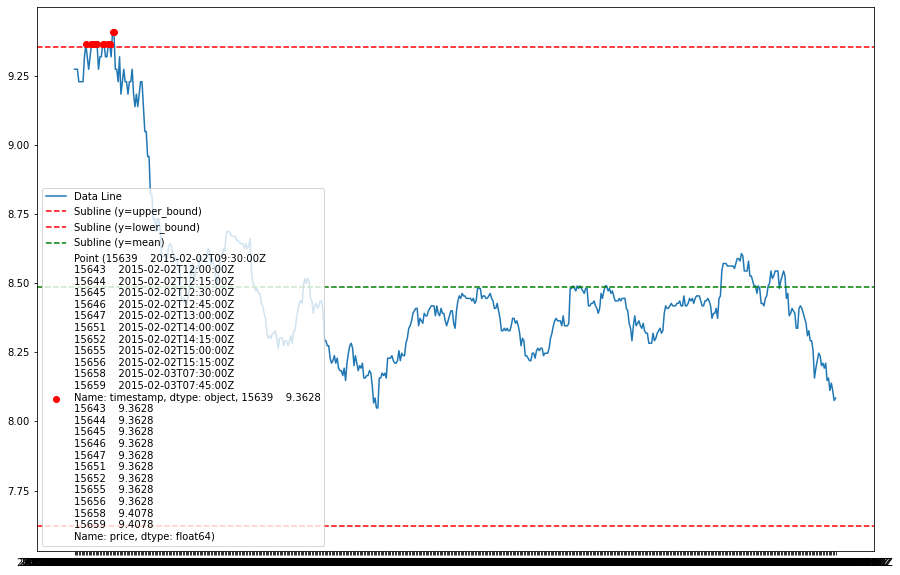

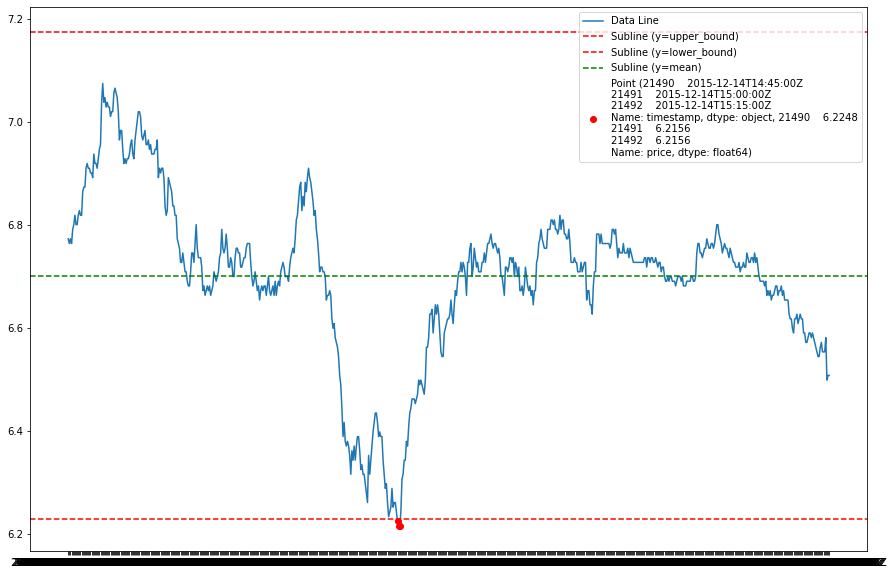

In [49]:
# Find and highlight the outlier points of GARAN

find_outliers(garan_grouped_data)

      company             timestamp   price  Year Month Day Hour Minute Second
14726   AKBNK  2014-12-16T14:45:00Z  6.0394  2014    12  16   14     45    00Z
14727   AKBNK  2014-12-16T15:00:00Z  6.0470  2014    12  16   15     00    00Z
14729   AKBNK  2014-12-16T15:30:00Z  6.0394  2014    12  16   15     30    00Z
14730   AKBNK  2014-12-17T07:30:00Z  6.0470  2014    12  17   07     30    00Z
      company             timestamp  price  Year Month Day Hour Minute Second
15622   AKBNK  2015-02-03T07:45:00Z  7.122  2015    02  03   07     45    00Z
      company             timestamp   price  Year Month Day Hour Minute Second
17946   AKBNK  2015-06-08T06:30:00Z  5.5905  2015    06  08   06     30    00Z
17947   AKBNK  2015-06-08T06:45:00Z  5.6457  2015    06  08   06     45    00Z
17950   AKBNK  2015-06-08T07:30:00Z  5.6692  2015    06  08   07     30    00Z
17951   AKBNK  2015-06-08T07:45:00Z  5.6692  2015    06  08   07     45    00Z
17952   AKBNK  2015-06-08T08:00:00Z  5.6457  2015    0

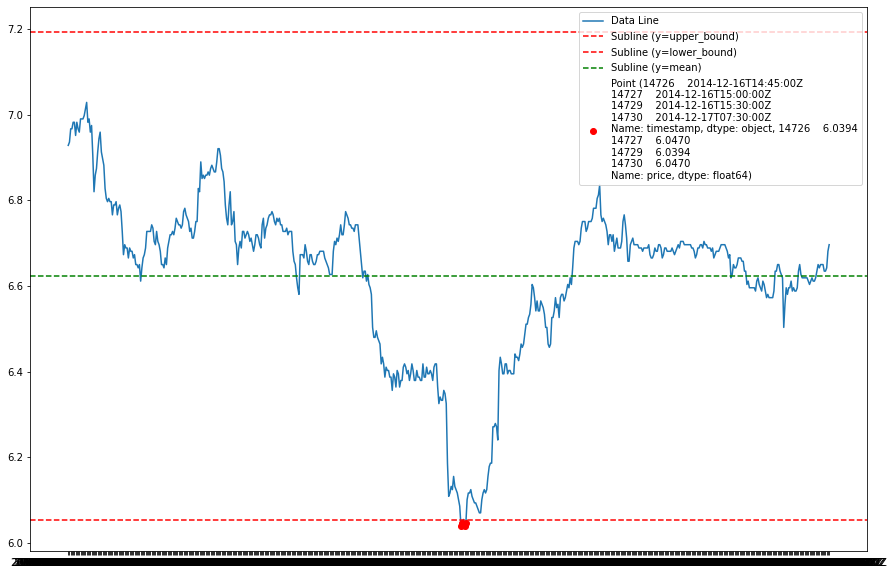

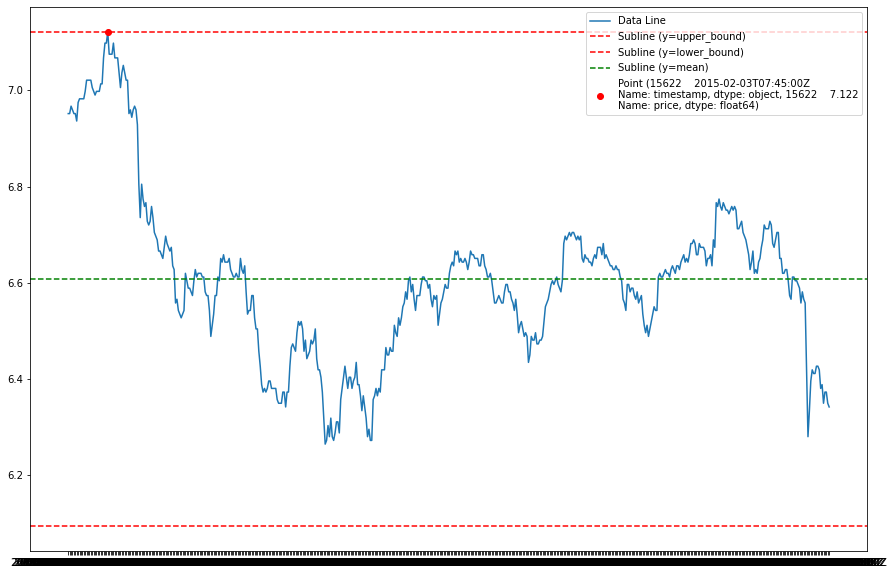

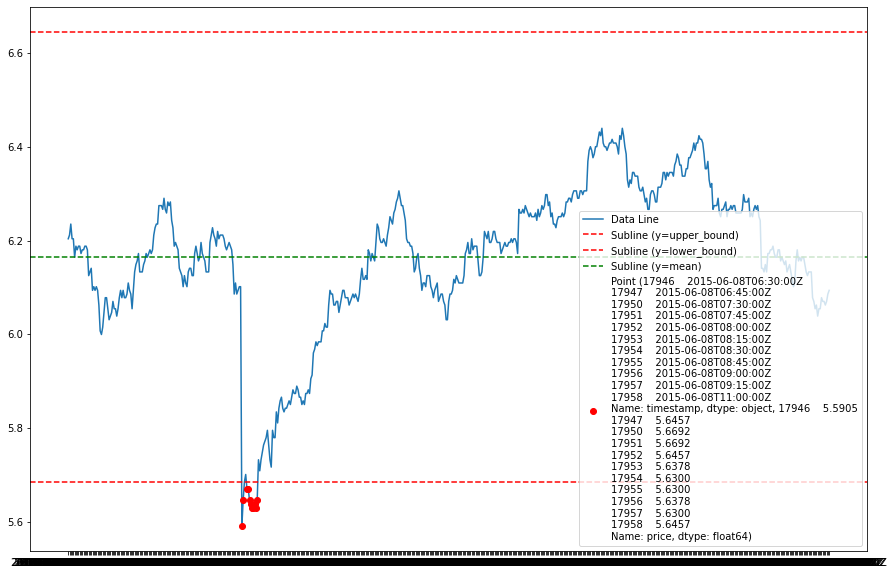

In [50]:
# Find and highlight the outlier points of AKBNK

find_outliers(akbnk_grouped_data)

     company             timestamp  price  Year Month Day Hour Minute Second
4977   PGSUS  2014-01-31T14:30:00Z   26.5  2014    01  31   14     30    00Z
4978   PGSUS  2014-01-31T14:45:00Z   26.4  2014    01  31   14     45    00Z
4979   PGSUS  2014-01-31T15:00:00Z   26.2  2014    01  31   15     00    00Z
4980   PGSUS  2014-01-31T15:15:00Z   26.0  2014    01  31   15     15    00Z
4981   PGSUS  2014-01-31T15:30:00Z   26.0  2014    01  31   15     30    00Z
     company             timestamp  price  Year Month Day Hour Minute Second
4982   PGSUS  2014-02-03T07:30:00Z   24.9  2014    02  03   07     30    00Z
     company             timestamp  price  Year Month Day Hour Minute Second
7276   PGSUS  2014-06-10T07:00:00Z  30.50  2014    06  10   07     00    00Z
7277   PGSUS  2014-06-10T07:15:00Z  30.45  2014    06  10   07     15    00Z
7279   PGSUS  2014-06-10T07:45:00Z  30.40  2014    06  10   07     45    00Z
7280   PGSUS  2014-06-10T08:00:00Z  30.55  2014    06  10   08     00    00Z

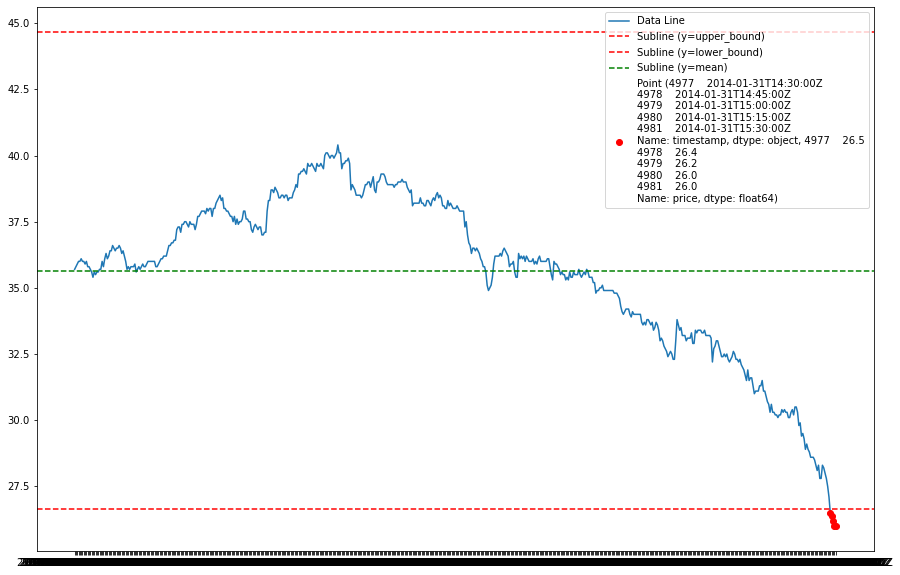

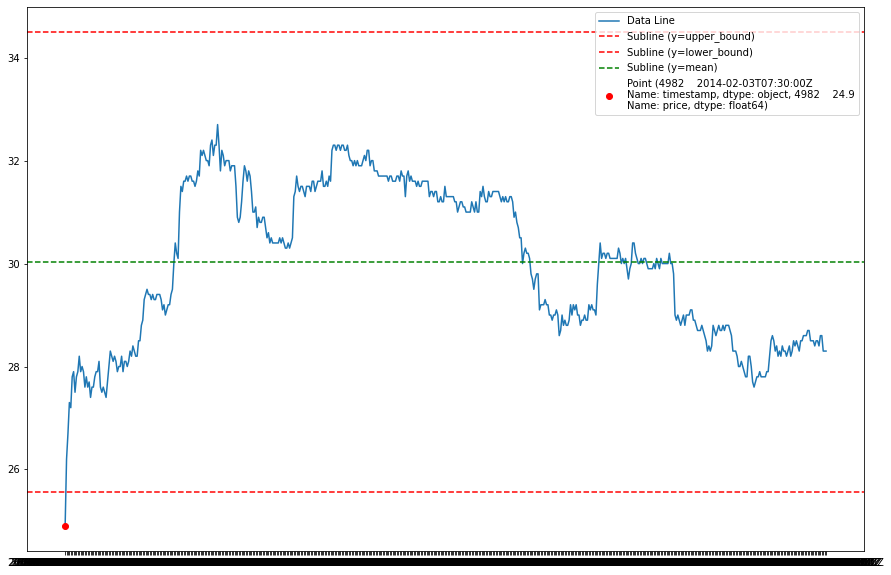

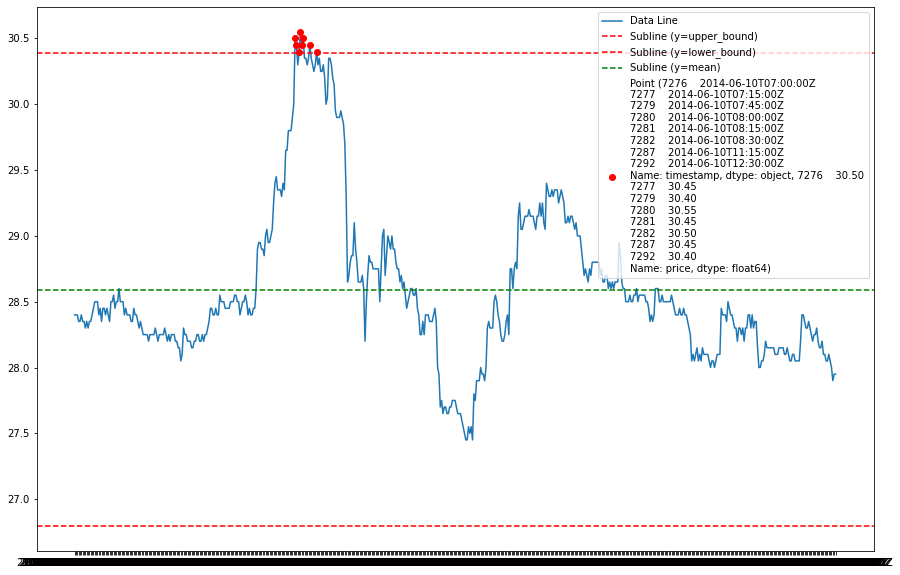

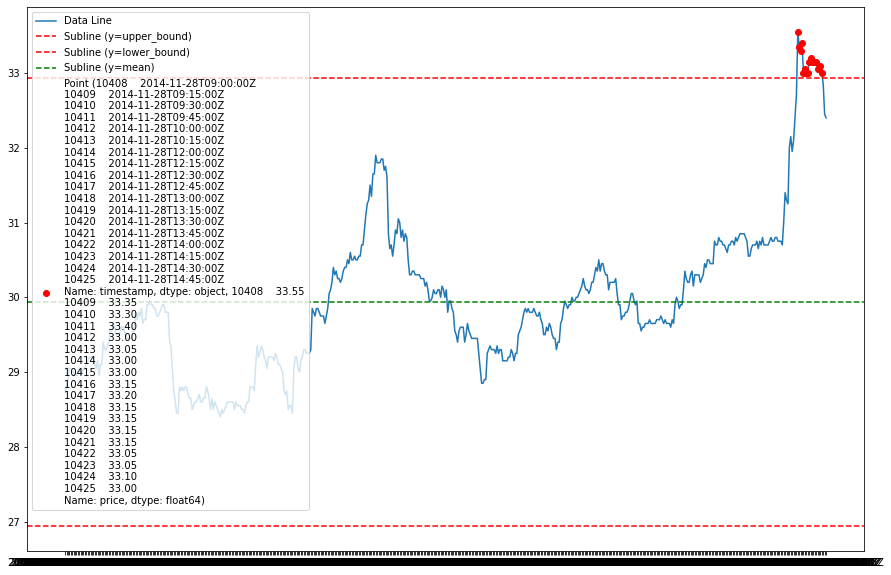

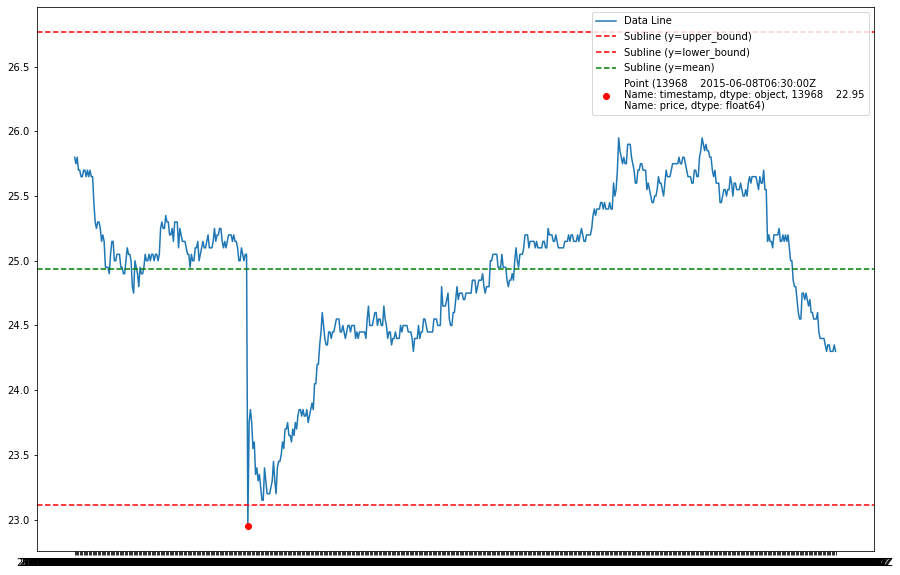

In [51]:
# Find and highlight the outlier points of PGSUS

find_outliers(pgsus_grouped_data)

      company             timestamp  price  Year Month Day Hour Minute Second
14368   THYAO  2014-11-28T09:00:00Z    9.4  2014    11  28   09     00    00Z


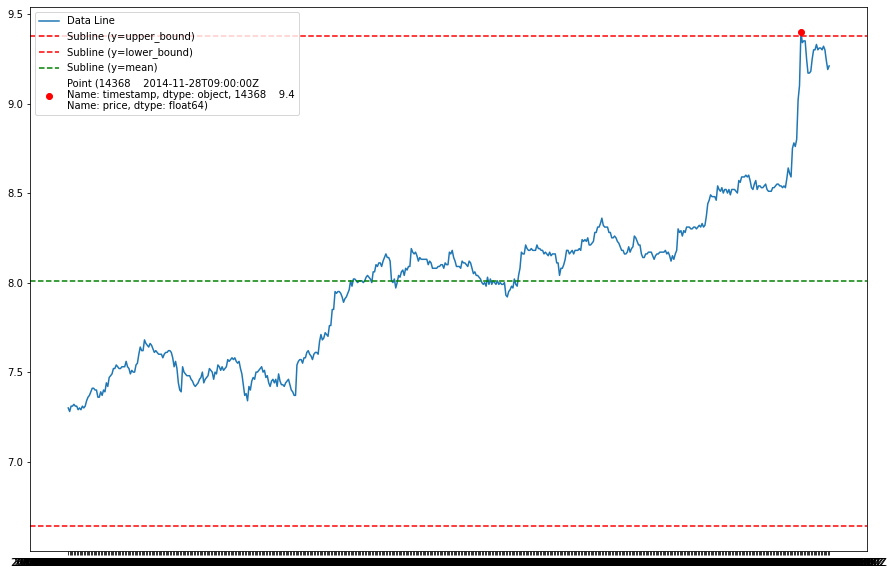

In [52]:
# Find and highlight the outlier points of THYAO

find_outliers(thyao_grouped_data)